## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [179]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

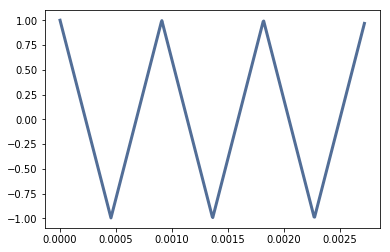

In [183]:
signal = thinkdsp.TriangleSignal(1_100)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=200_000)
segment.plot()

Make a wave and play it.

In [184]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

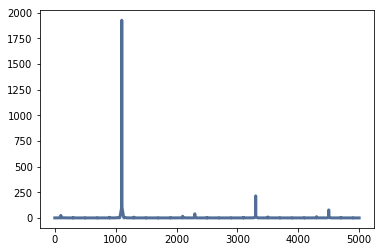

In [188]:
spectrum = wave.make_spectrum()
spectrum.plot()

5000.0

Make a square signal and plot a 3 period segment.

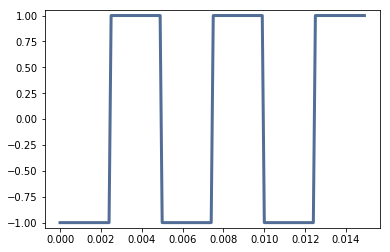

In [3]:
signal = thinkdsp.SquareSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

Make a wave and play it.

In [4]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

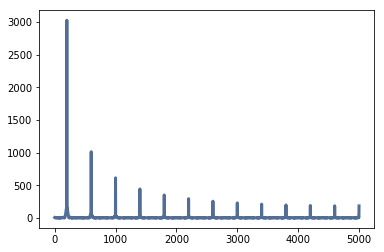

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot()

Create a sawtooth signal and plot a 3 period segment.

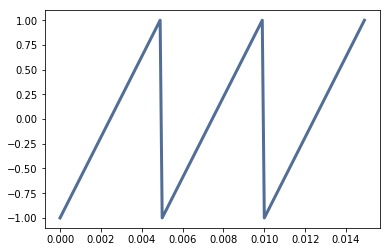

In [6]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

Make a wave and play it.

In [7]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

Compute its spectrum and plot it.

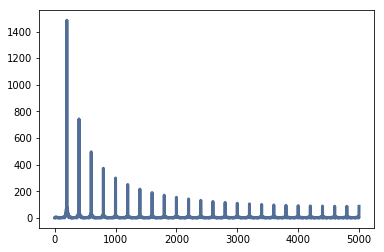

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot()

### Aliasing

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

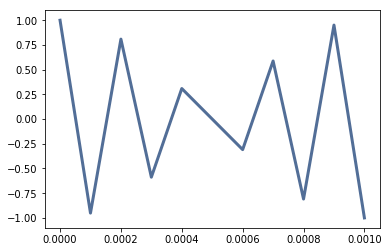

In [192]:
framerate = 10_000

signal = thinkdsp.CosSignal(4_500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

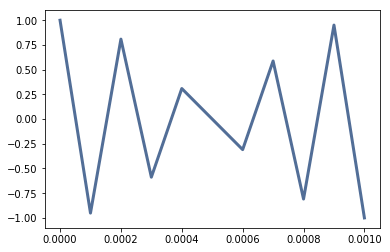

In [194]:
signal = thinkdsp.CosSignal(5_500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

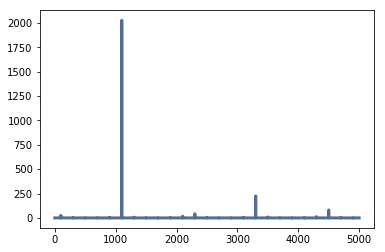

In [199]:
signal = thinkdsp.TriangleSignal(1_100)
segment = signal.make_wave(duration=0.5, framerate=10_000)
spectrum = segment.make_spectrum()
spectrum.plot()

## Amplitude and phase

Make a sawtooth wave.

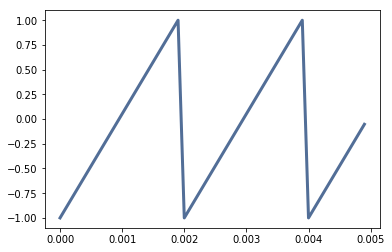

In [12]:
signal = thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()

Play it.

In [13]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [14]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [15]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

Plot the magnitudes vs the frequencies.

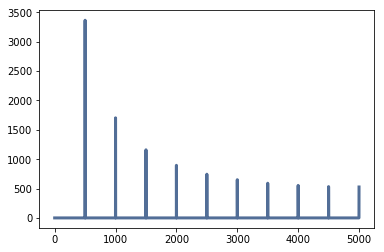

In [16]:
magnitude = np.absolute(hs)
thinkplot.plot(fs, magnitude)

Plot the phases vs the frequencies.

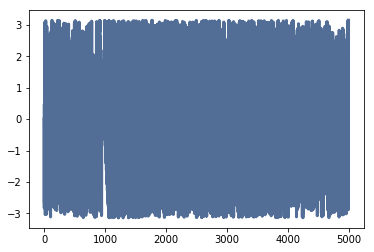

In [17]:
angle = np.angle(hs)
thinkplot.plot(fs, angle)

## What does phase sound like?

Shuffle the phases.

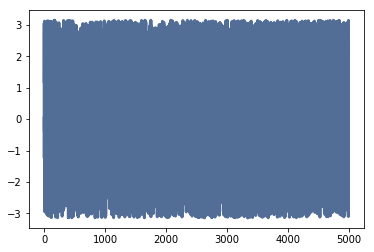

In [18]:
import random
random.shuffle(angle)
thinkplot.plot(fs, angle)

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [19]:
i = complex(0, 1)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

Convert the spectrum back to a wave (which uses irfft).

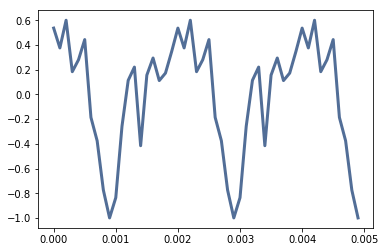

In [20]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()

Play the wave with the shuffled phases.

In [21]:
wave2.make_audio()

For comparison, here's the original wave again.

In [22]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## Aliasing interaction

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [23]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue')
    thinkplot.show(xlabel='frequency', ylabel='amplitude')
    
    display(wave.make_audio())

In [24]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

# Exercise 2.2

In [157]:
import math 
PI2 = 2 * math.pi

In [174]:
class SawtoothSignal(thinkdsp.Sinusoid):
    def __init__(self, freq=440, amp=1.0, offset=0):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        
    @property
    def period(self):
        return 1. / self.freq
        
    def evaluate(self, ts):
        ys = ts % self.period * 20 * self.amp - 1
        return ys
        # cycles = self.freq * ts + self.offset / PI2
        # frac, _ = np.modf(cycles)
        # ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        # return ys

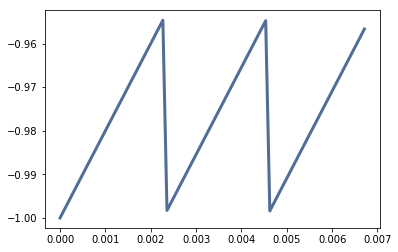

In [175]:
SawtoothSignal().plot()

In [171]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
sawtooth.make_audio()

In [172]:
#signal = Sawtoothwave(freq=440)
#duration = 0.5
#segment = signal.make_wave(duration, framerate=40_000)
#segment.plot()

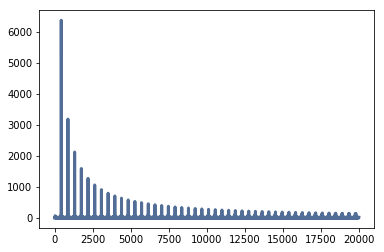

In [173]:
sawtooth.make_spectrum().plot()

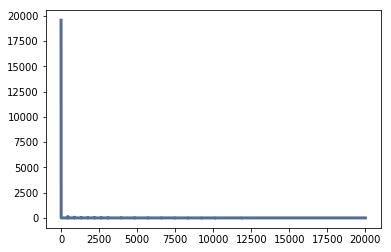

In [136]:
spectrum = segment.make_spectrum()
spectrum.plot()

# Exercise 2.3

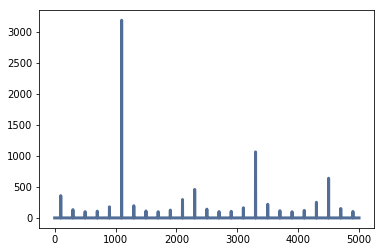

In [208]:
# signal = thinkdsp.SquareSignal(freq=11_000)
signal = thinkdsp.SquareSignal(freq=1_100)
duration = 0.5
wave = signal.make_wave(duration, framerate=10_000)
spectrum = wave.make_spectrum()
spectrum.plot()


In [209]:
wave.make_audio()

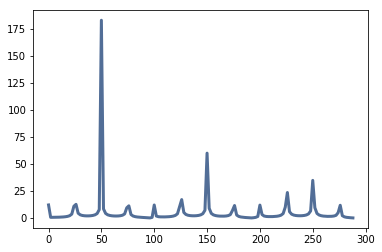

In [178]:
wave2 = signal.make_wave(duration, framerate=575)
spectrum = wave2.make_spectrum()
spectrum.plot()

In [96]:
thinkdsp.SquareSignal(1100).make_wave(duration=0.9, framerate=10000).make_audio()

# Exercise 2.4

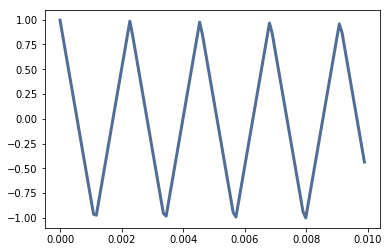

In [213]:
signal = thinkdsp.TriangleSignal(freq=440)
wave = signal.make_wave(duration=0.01)
wave.plot()

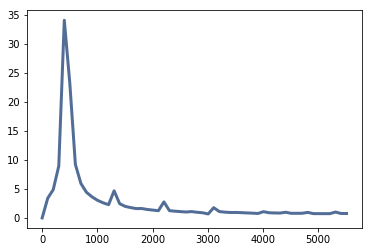

In [216]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [217]:
spectrum.hs[0]

(1.0436096431476471e-14+0j)

In [219]:
spectrum.hs[0] = 100

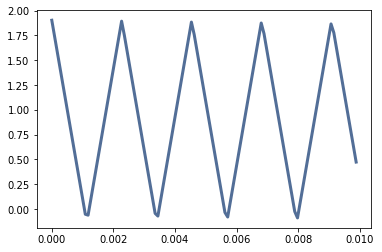

In [221]:
spectrum.make_wave().plot()

# 2.5

In [238]:
def make_strange_thing(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

In [239]:
signal = thinkdsp.TriangleSignal()
wave = signal.make_wave()
spectrum = wave.make_spectrum()

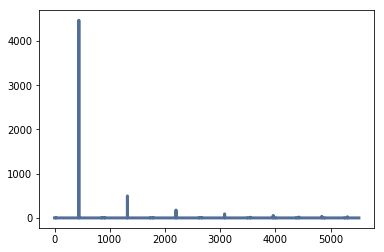

In [240]:
spectrum.plot()

In [241]:
wave.make_audio()

/home/geoffroy/.pyenv/versions/3.7.2/envs/dsp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/geoffroy/.pyenv/versions/3.7.2/envs/dsp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


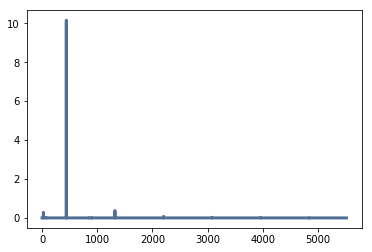

In [242]:
make_strange_thing(spectrum)
spectrum.plot()

In [243]:
spectrum.make_wave().make_audio()